In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [7]:
players <- read_csv("players.csv")
players
sessions <- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [8]:
summary(players)
summary(sessions)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [9]:
sessions <- sessions |>
  mutate(total_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time,total_minutes
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,0
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12,0
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12,0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12,0


In [10]:
player_minutes <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_minutes = sum(total_minutes, na.rm = TRUE))
player_minutes

hashedEmail,total_minutes
<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,525600
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2105280
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,0
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,0


In [11]:
player_full <- players |>
  left_join(player_minutes, by = "hashedEmail")
player_full

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_minutes
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,-13106880
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,0
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57,0
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,0
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,0


In [12]:
players |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE))
players

mean_age,mean_hours
<dbl>,<dbl>
21.13918,5.845918


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


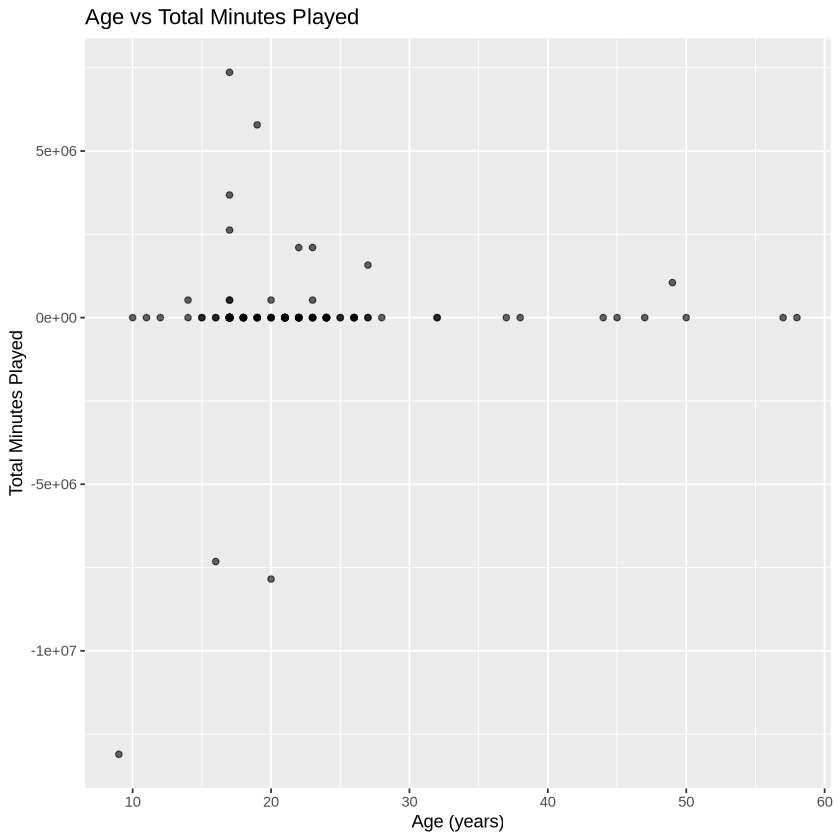

In [13]:
ggplot(player_full, aes(x = Age, y = total_minutes)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Age vs Total Minutes Played",
    x = "Age (years)",
    y = "Total Minutes Played"
  )

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


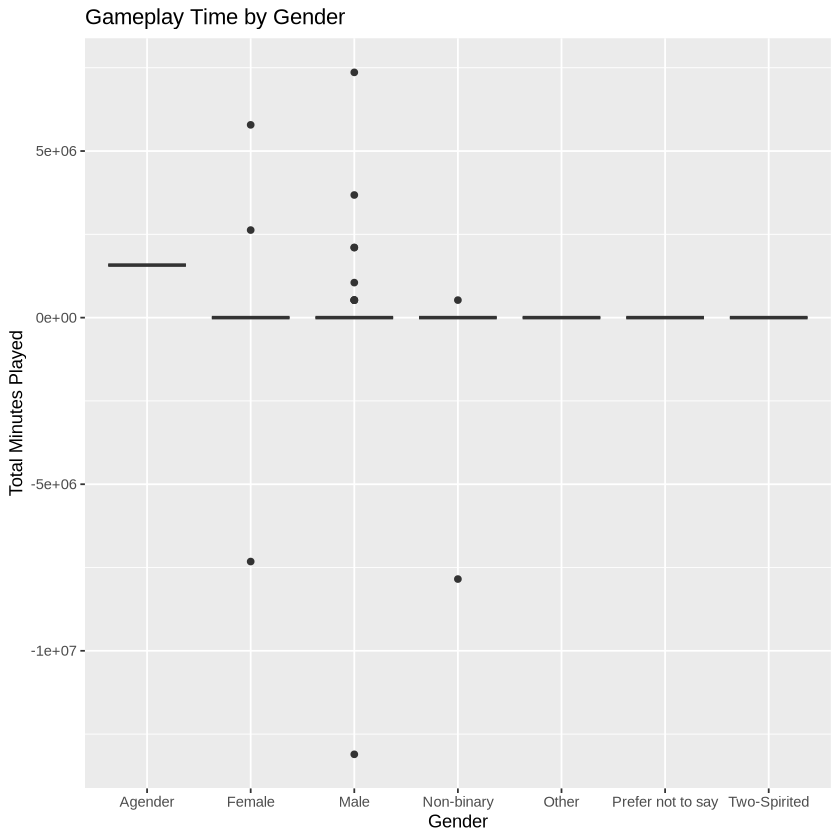

In [14]:
ggplot(player_full, aes(x = gender, y = total_minutes)) +
  geom_boxplot() +
  labs(
    title = "Gameplay Time by Gender",
    x = "Gender",
    y = "Total Minutes Played"
  )

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


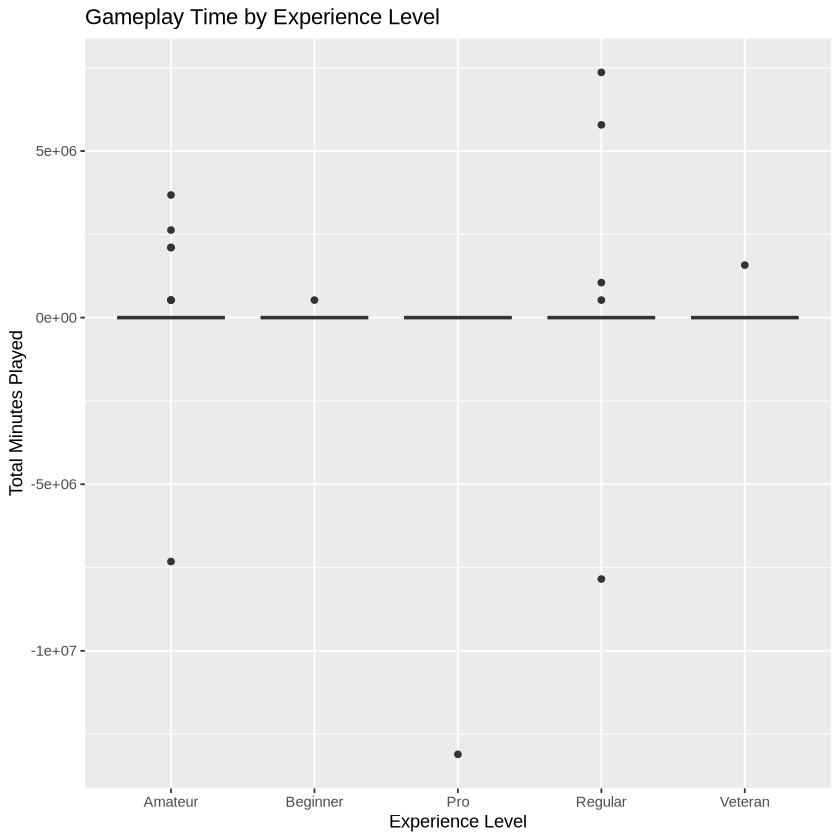

In [15]:
ggplot(player_full, aes(x = experience, y = total_minutes)) +
  geom_boxplot() +
  labs(
    title = "Gameplay Time by Experience Level",
    x = "Experience Level",
    y = "Total Minutes Played"
  )

Data Description

This project uses two datasets collected from a research Minecraft server run by UBC Computer Science.
The players.csv file contains demographic and account-level attributes for each player, while
sessions.csv records every play session with timestamp information.

players.csv
	•	7 variables and r nrow(players) observations
	•	Variables include:
	•	hashedEmail (character): anonymous unique player ID
	•	Age (numeric): player age
	•	gender (character): self-reported gender
	•	experience (categorical): prior gaming experience
	•	played_hours (numeric): total hours played
	•	subscribe (logical/numeric): indicates whether the player subscribed to a newsletter
	•	name (character): chosen player name

sessions.csv
	•	5 variables and r nrow(sessions) observations
	•	Variables include:
	•	hashedEmail: links session to a player
	•	start_time, end_time: timestamps for each session
	•	original_start_time, original_end_time: raw timestamps
	•	session duration is computed in minutes.

Potential data issues
	•	Missing timestamps may affect session duration.
	•	Self-reported fields (age, gender, experience) may contain noise or bias.
	•	Players may appear in sessions.csv but not in players.csv (merge will create NAs).
	•	Timezone information is not included.

Overall, the dataset is suitable for exploring which player characteristics are associated with high gameplay time.



2. Questions

Broad Question (Q2):

Which types of players contribute the most gameplay time on the research server?

Specific Question:

Can player characteristics such as age, gender, and gaming experience predict total gameplay time?

The response variable will be total_minutes (computed from sessions.csv).
Explanatory variables include Age, gender, and experience from players.csv.

To answer this question, the two datasets must be merged using hashedEmail and session duration must be calculated using timestamps.





3. Exploratory Data Analysis

The dataset was successfully loaded into R, minimal wrangling was performed, and quantitative variables were summarized.
The following plots provide early insight into possible relationships:
	•	Older players show moderate variation in total playtime, with no obvious linear trend.
	•	Gender groups show similar distributions of gameplay time, though the median varies slightly.
	•	More experienced players appear to spend more time on the server, suggesting experience may be a strong predictor.

These observations help justify which variables should be included in the predictive model in later stages.



4. Methods and Plan

To answer the specific research question, I plan to use a regression model, likely a
multiple linear regression or random forest regression.

Why this method is appropriate
	•	The response variable (total_minutes) is continuous.
	•	Linear regression is interpretable; random forests can capture nonlinear patterns.

Assumptions

For linear regression:
	•	Linearity between predictors and response
	•	Homoscedasticity
	•	Residual normality

These will be checked in the final project.

Limitations
	•	Self-reported variables may reduce model accuracy
	•	Missing session data could bias total_minutes
	•	Nonlinear effects may not fit linear regression

Model selection
	•	Split data into training (80%) and test (20%)
	•	Compare models using RMSE
	•	Use 5-fold cross-validation for tuning if tree-based methods are used

Processing plan
	1.	Merge datasets using hashedEmail
	2.	Compute total playtime
	3.	Clean missing values
	4.	Split dataset once at the start
	5.	Train several models
	6.	Evaluate on a held-out test set



5. GitHub Repository

I will maintain a GitHub repository containing all work for the individual planning report.
The repository includes at least five commits documenting incremental progress, such as:
	•	Uploading notebook
	•	Cleaning data
	•	Writing data description
	•	Adding EDA plots
	•	Writing methods section